# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'
labels = []
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open('signnames.csv', mode='r') as f:
    next(f) # skip the first line
    reader = csv.reader(f)
    for row in reader:
        labels.append(row[1])
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

img_size = 32
img_size_flat = img_size*img_size  # Images will be converted to grayscale
num_channels = 1

# TODO: What's the shape of an traffic sign image?
image_shape = (img_size, img_size, 3)

# TODO: How many unique classes/labels there are in the dataset.
num_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", num_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

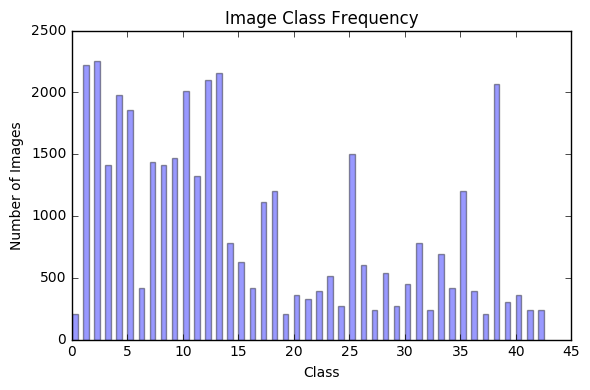

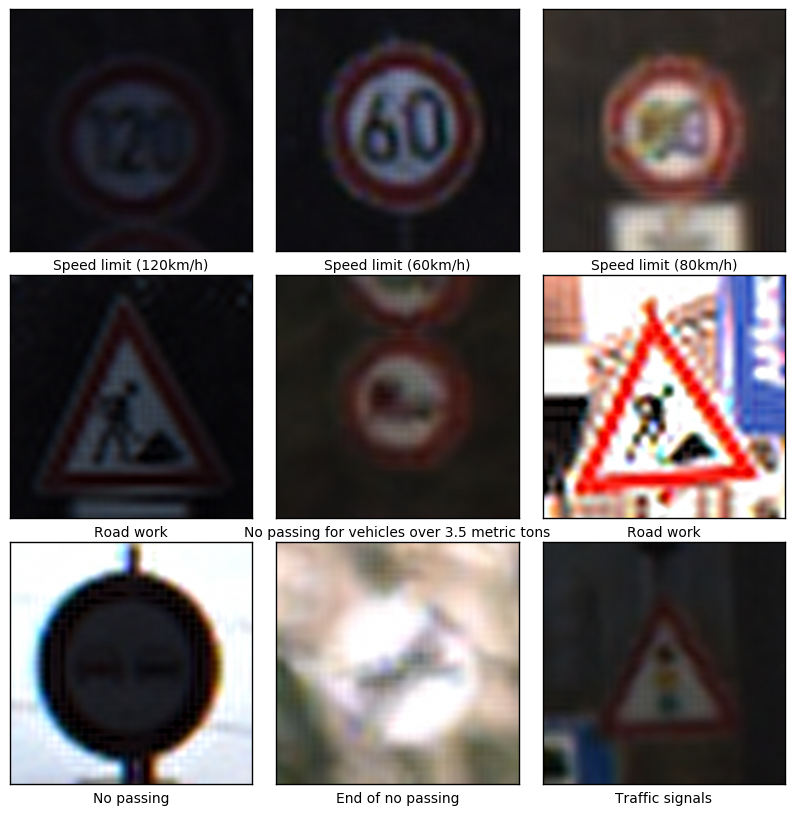

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
from PIL import Image
from random import randint
import math
import tensorflow as tf
import collections

# Visualizations will be shown in the notebook.

def plot_labels_count(y_train):
    
    
    counter=collections.Counter(y_train)
    
    labels_frequency = [x[1] for x in sorted(counter.most_common())]
    n_groups = len(labels_frequency)
    
    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.5
    opacity = 0.4

    rects1 = plt.bar(index, labels_frequency, bar_width,
                     alpha=opacity,
                     color='b')

    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Image Class Frequency')

    plt.tight_layout()
    plt.show()

def plot_images(train_data, train_labels, labels, plots_number=9):
    # Plots random images from the dataset
    # Create figure with sub-plots.
    
    y_axes = 3
    x_axes = math.ceil(plots_number/3.0)
    
    fig, axes = plt.subplots(x_axes, y_axes, figsize=(10, 10))
    
    # Adjust vertical spacing.
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    y = 0
    x = 0
    for i in range(0, plots_number):
        
        ax = axes[x][y]
        rnd_index = randint(0,len(train_data))
        ax.imshow(train_data[rnd_index] / 255.0, interpolation='sinc', cmap='gray')
        try:
            ax.set_xlabel(labels[train_labels[rnd_index]])
        except:
            print('Sign Without Label')
        y+=1
        if y == 3:
            y=0
            x+= 1

    # Remove ticks from all the plots.
    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

plot_labels_count(y_train)

plot_images(X_train, y_train, labels)

%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Generating label: 0 images
Generating label: 1 images
Generating label: 2 images
Generating label: 3 images
Generating label: 4 images
Generating label: 5 images
Generating label: 6 images
Generating label: 7 images
Generating label: 8 images
Generating label: 9 images
Generating label: 10 images
Generating label: 11 images
Generating label: 12 images
Generating label: 13 images
Generating label: 14 images
Generating label: 15 images
Generating label: 16 images
Generating label: 17 images
Generating label: 18 images
Generating label: 19 images
Generating label: 20 images
Generating label: 21 images
Generating label: 22 images
Generating label: 23 images
Generating label: 24 images
Generating label: 25 images
Generating label: 26 images
Generating label: 27 images
Generating label: 28 images
Generating label: 29 images
Generating label: 30 images
Generating label: 31 images
Generating label: 32 images
Generating label: 33 images
Generating label: 34 images
Generating label: 35 images
Ge

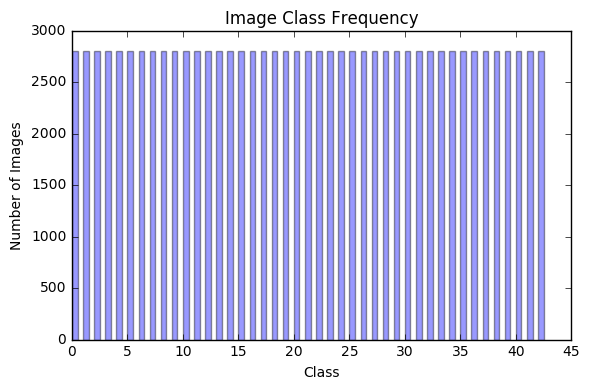

In [36]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import random

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

# Generating new images aims at equalizing the number of examples of each class

image_class_count = 2800
def generate_images():
    label_counts = collections.Counter(y_train)
    new_x_train = np.array([])
    new_y_train = np.array([])
    for label in label_counts:
        print('Generating label: ' + str(label) + ' images')
        images = []
        for i in range(0, len(X_train)):
            if label == y_train[i]:
                images.append(X_train[i])
        while label_counts.get(label) < image_class_count:
            image = random.choice(images)
            image = transform_image(image,20,10,5)
            new_x_train = np.append(new_x_train,image)
            new_y_train = np.append(new_y_train,label)
            label_counts[label]+=1
    return new_x_train.reshape((-1,32,32,3)), new_y_train

new_x_train, new_y_train = generate_images()
print('input images: ' + str(len(X_train)))
print('generated images: ' + str(len(new_x_train)))

X_train = np.append(X_train, new_x_train).reshape((-1,32,32,3))
y_train = np.append(y_train, new_y_train)
print('Total training images: ' + str(len(X_train)))
plot_labels_count(y_train)

In [5]:
validation_set_size = len(X_train)/10
X_validation = X_train[0:validation_set_size]
y_validation = y_train[0:validation_set_size]
X_train = X_train[validation_set_size:]
y_train = y_train[validation_set_size:]

print('Training set: ' + str(len(X_train)))
print('Validation set: ' + str(len(X_validation)))


Training set: 35289
Validation set: 3920


/home/tisho/anaconda3/envs/drive_env/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/tisho/anaconda3/envs/drive_env/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/tisho/anaconda3/envs/drive_env/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/tisho/anaconda3/envs/drive_env/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [8]:
# Save the generated data for faster load
import pickle 
generated_data = {'X_train': X_train, 'y_train': y_train, 'X_validation': X_validation, 'y_validation': y_validation,
                 'X_test': X_test, 'y_test': y_test}
pickle.dump( generated_data, open( "gen_data.p", "wb" ) )

In [ ]:
# Load saved data
# generated_data = pickle.load( open( "gen_data.p", "rb" ) )
# X_validation = generated_data.get('X_validation')
# y_validation = generated_data.get('y_validation')
# X_train = generated_data.get('X_train')
# y_train = generated_data.get('y_train')
# X_test = generated_data.get('X_test')
# y_test = generated_data.get('y_test')

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [25]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 10
BATCH_SIZE = 128
layer_one_features = 12
layer_two_features = 48

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28xlayer_one_features.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, layer_one_features), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(layer_one_features))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28xlayer_one_features. Output = 14x14xlayer_one_features.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10xlayer_two_features.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, layer_one_features, layer_two_features), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(layer_two_features))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10xlayer_two_features. Output = 5x5xlayer_two_features.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5xlayer_two_features. Output = 5*5*layer_two_features(flat).
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 5*5*layer_two_features. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*layer_two_features, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits




In [26]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [27]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [28]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.604

EPOCH 2 ...
Validation Accuracy = 0.722

EPOCH 3 ...
Validation Accuracy = 0.787

EPOCH 4 ...
Validation Accuracy = 0.830

EPOCH 5 ...
Validation Accuracy = 0.852

EPOCH 6 ...
Validation Accuracy = 0.858

EPOCH 7 ...
Validation Accuracy = 0.879

EPOCH 8 ...
Validation Accuracy = 0.899

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.908

Model saved


In [31]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.867


In [337]:

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape((img_size, img_size)), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(labels[cls_true[i]])
        else:
            xlabel = "True: {0} \n Pred: {1}".format(labels[cls_true[i]], labels[cls_pred[i]])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.setp(ax.get_xticklabels(), rotation=30)
    plt.tight_layout()
    plt.show()
    
def plot_example_errors(cls_pred, correct):
     # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = images_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = cls_test[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = cls_test
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [316]:
print(cls_test[0:20])
print(labels[1])
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

[16  1 38 33 11 38 18 12 25 35 12  7 23  7  4  9 21 20 27 38]
Speed limit (30km/h)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [317]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [318]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [319]:

def evaluate_external_image(image_path):
    def softmax(w, t = 1.0):
        e = np.exp(npa(w) / t)
        dist = e / np.sum(e)
        return dist
    
    from PIL import Image
    im = Image.open(image_path)
    im = np.array(im)
    im = rgb2gray(im)
    im = im.reshape(1024)
    c = layer_fc2.eval(feed_dict={x: [im]}, session=session)
    npa = np.array
    d=softmax(c[0])
    for i in range(0,43):
        if d[i]>0.01:
            print ("{0:.0f}% - ".format(d[i]*100) + labels[i])

# evaluate_external_image('test3.jpg')

In [7]:
import cv2
import collections
import random

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

def pre_process_images():
    label_counts = collections.Counter(y_train)
    new_x_train = np.array([])
    new_y_train = np.array([])
    for label in label_counts:
        print('Generating label: ' + str(label) + ' images')
        images = []
        for i in range(0, len(X_train)):
            if label == y_train[i]:
                images.append(X_train[i])
        while label_counts.get(label) < 2800:
            image = random.choice(images)
            image = transform_image(image,20,10,5)
            new_x_train = np.append(new_x_train,image)
            new_y_train = np.append(new_y_train,label)
            label_counts[label]+=1
    return new_x_train.reshape((-1,32,32,3)), new_y_train
# new_image = transform_image(X_test[1],20,10,5)
# plt.imshow(new_image)
print('before: ' + str(len(X_train)))
new_x_train, new_y_train = pre_process_images()
print('after: ' + str(len(new_x_train)))

before: 54710
Generating label: 0.0 images
Generating label: 1.0 images
Generating label: 2.0 images
Generating label: 3.0 images
Generating label: 4.0 images
Generating label: 5.0 images
Generating label: 6.0 images
Generating label: 7.0 images
Generating label: 8.0 images
Generating label: 9.0 images
Generating label: 10.0 images
Generating label: 11.0 images
Generating label: 12.0 images
Generating label: 13.0 images
Generating label: 14.0 images
Generating label: 15.0 images
Generating label: 16.0 images
Generating label: 17.0 images
Generating label: 18.0 images
Generating label: 19.0 images


KeyboardInterrupt: 

In [9]:
# plt.imshow(new_x_train[200])
#plt.imshow(random.choice(X_train))



70211


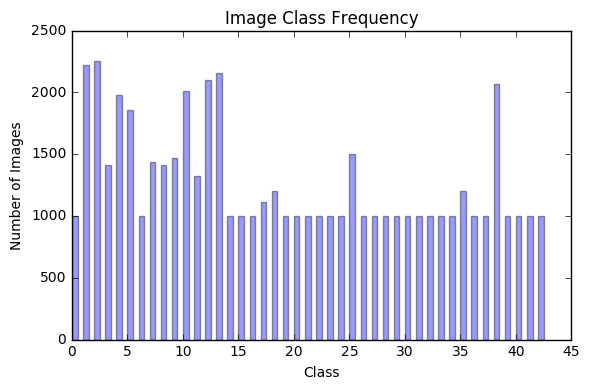

In [329]:
plot_labels_count(y_train)